# Global optimisation

Need to compare results of global optimisation runs.

We have a set of data for ISRES runs on baseline 2017, with 1e0 constraint tolerance, running for different numbers of evaluations.

In [4]:
# Want a df of all runs: VMCON, then 3 global runs with different attributes
import plot_solvers as ps
from pathlib import Path

# Should reload Process each time (keep editable install up-to-date)
%load_ext autoreload
%aimport process, plot_solvers
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# Define data location
isres_run_dir = Path("/home/jon/data/process/baseline2017/numevals_isres")
vmcon_run_dir = Path("/home/jon/data/process/baseline2017/original")

# Mfiles and tags for each run to be plotted
runs_metadata = [
    ps.RunMetadata(vmcon_run_dir / "baseline2017_MFILE.DAT", "vmcon"),
    ps.RunMetadata(isres_run_dir / "1e3/baseline_2017_MFILE.DAT", "1e3 evals"),
    ps.RunMetadata(isres_run_dir / "1e4/baseline_2017_MFILE.DAT", "1e4 evals"),
    ps.RunMetadata(isres_run_dir / "1e5/baseline_2017_MFILE.DAT", "1e5 evals")
]

# Create dataframe for all run data and metadata
results_df = ps._create_df_from_run_metadata(runs_metadata)
results_df

,mfile_path,tag,scenario,solver,procver,date,time,username,runtitle,tagno,...,rejected_main,pnetelmw/(powfmw+emultmw,pnetelmw/powfmw,etath,cirpowfr,waterusetower,wateruserecirc,wateruseonethru,error_status,error_id
0,/home/jon/data/process/baseline2017/original/b...,vmcon,,,2.4.0,03/01/2023,11:15,jon,"""Run Title (change this line using input varia...",v2.4.0-525-g8cedb829d,...,1306.2,20.960,24.949,41.1,0.45144,55534.0,18633.0,1826000.0,2.0,244.0
1,/home/jon/data/process/baseline2017/numevals_i...,1e3 evals,,,2.4.0,22/12/2022,07:56,jmaddock,"""Run Title (change this line using input varia...",v2.4.0-529-g85cdde289,...,1310.0,21.788,25.935,41.1,0.40840,55696.0,18687.0,1831400.0,2.0,145.0
2,/home/jon/data/process/baseline2017/numevals_i...,1e4 evals,,,2.4.0,22/12/2022,08:06,jmaddock,"""Run Title (change this line using input varia...",v2.4.0-529-g85cdde289,...,1310.0,21.788,25.935,41.1,0.40840,55696.0,18687.0,1831400.0,2.0,145.0
3,/home/jon/data/process/baseline2017/numevals_i...,1e5 evals,,,2.4.0,22/12/2022,08:13,jmaddock,"""Run Title (change this line using input varia...",v2.4.0-529-g85cdde289,...,5731.0,-91.250,-108.620,41.1,3.62850,243650.0,81750.0,8011500.0,2.0,157.0


Now we want to work out percentage diffs relative to VMCON solution.

In [11]:
# Filter for tag, optimisation parameters and objective function
filtered_results_df = ps._filter_vars_of_interest(results_df)
filtered_results_df

,tag,norm_objf,xcm001,xcm002,xcm003,xcm004,xcm005,xcm006,xcm007,xcm008,...,xcm023,xcm024,xcm025,xcm026,xcm027,xcm028,xcm029,xcm030,xcm031,xcm032
0,vmcon,1.89220,0.93345,1.04290,1.03380,1.0719,0.95783,1.00000,1.00000,1.0499,...,1.18710,1.1871,1.000000,1.0000,0.91183,1.0000,1.0000,2.57500,1.0770,1.00000
1,1e3 evals,1.81440,1.00000,1.00000,1.00000,1.0000,1.00000,1.00000,1.00000,1.0000,...,1.00000,1.0000,1.000000,1.0000,1.00000,1.0000,1.0000,1.00000,1.0000,1.00000
2,1e4 evals,1.81440,1.00000,1.00000,1.00000,1.0000,1.00000,1.00000,1.00000,1.0000,...,1.00000,1.0000,1.000000,1.0000,1.00000,1.0000,1.0000,1.00000,1.0000,1.00000
3,1e5 evals,0.63861,2.72260,0.35197,0.79085,32.3950,10.97700,0.65455,0.97398,1.5423,...,0.70769,1.1622,0.087162,1.4168,1.59440,1.3431,7.6663,0.43756,6.4846,0.20891


In [15]:
# Work out the percentage diff relative to vmcon-tagged solution
diffs_df = ps._percentage_changes(filtered_results_df, "vmcon")
diffs_df

,tag,norm_objf,xcm001,xcm002,xcm003,xcm004,xcm005,xcm006,xcm007,xcm008,...,xcm023,xcm024,xcm025,xcm026,xcm027,xcm028,xcm029,xcm030,xcm031,xcm032
1,1e3 evals,-4.111616,7.129466,-4.113530,-3.269491,-6.707715,4.402660,0.000,0.000,-4.752834,...,-15.761098,-15.761098,0.0000,0.00,9.669566,0.00,0.00,-61.165049,-7.149489,0.000
2,1e4 evals,-4.111616,7.129466,-4.113530,-3.269491,-6.707715,4.402660,0.000,0.000,-4.752834,...,-15.761098,-15.761098,0.0000,0.00,9.669566,0.00,0.00,-61.165049,-7.149489,0.000
3,1e5 evals,-66.250396,191.670684,-66.250839,-23.500677,2922.203564,1046.028001,-34.545,-2.602,46.899705,...,-40.384972,-2.097549,-91.2838,41.68,74.857155,34.31,666.63,-83.007379,502.098422,-79.109


/home/jon/code/notebooks/nlopt_process/plot_solvers.py:498: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(opt_params_labels)
/home/jon/code/notebooks/nlopt_process/plot_solvers.py:519: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(norm_objf_label)


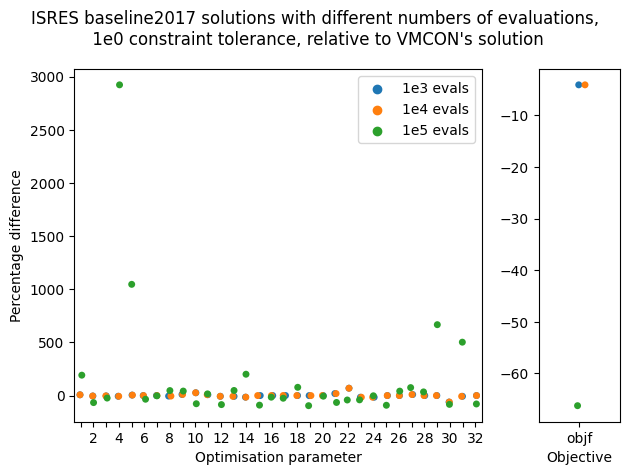

In [17]:
# Plot
ps._plot_solution_diffs(diffs_df, "ISRES baseline2017 solutions with different numbers of evaluations,\n 1e0 constraint tolerance, relative to VMCON's solution")

With 1e5 evaluations, a lower objective function is found, but with high constraint residuals. A local optimisation could be started in this region, or another global optimisation with lower constraint tolerances could be performed, to see if an alternative solution might exist here.

In [18]:
# Compare constraint residuals and objective function
results_df[["tag", "sqsumsq", "norm_objf"]]

,tag,sqsumsq,norm_objf
0,vmcon,1.921000e-10,1.89220
1,1e3 evals,8.624700e-01,1.81440
2,1e4 evals,8.624700e-01,1.81440
3,1e5 evals,3.561800e+00,0.63861


## Lowering constraint residuals to 1e-3

Try ISRES again, running for 1e5 evaluations, but with constraint residuals lowered to 1e-3.

/home/jon/code/notebooks/nlopt_process/plot_solvers.py:498: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(opt_params_labels)
/home/jon/code/notebooks/nlopt_process/plot_solvers.py:519: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(norm_objf_label)


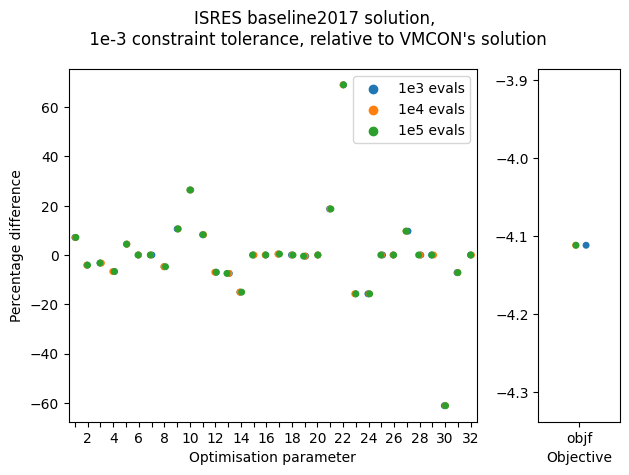

In [39]:
lower_constraints_dir = Path("/home/jon/data/process/baseline2017/numevals_isres_1e-3_tol")
mfile_name = "baseline_2017_MFILE.DAT"

runs_metadata = [
    ps.RunMetadata(vmcon_run_dir / "baseline2017_MFILE.DAT", "vmcon"),
    ps.RunMetadata(lower_constraints_dir / "1e3" / mfile_name, "1e3 evals"),
    ps.RunMetadata(lower_constraints_dir / "1e4" / mfile_name, "1e4 evals"),
    ps.RunMetadata(lower_constraints_dir / "1e5" / mfile_name, "1e5 evals"),
]

lower_constr_df = ps.global_comparison(runs_metadata, "vmcon", "ISRES baseline2017 solution,\n 1e-3 constraint tolerance, relative to VMCON's solution")

This shows that regardless of the number of evaluations, the optimal solution arrived at with a constraint tolerance of 1e-3 stays the same. It produces a lower objective function than the VMCON reference, but this is perhaps due to the constraint tolerances, which are still quite high. This solution might make a good candidate for a local optimisation starting point, however.

The global optimisation (with higher tolerances) believes it's found a smaller radius machine.

In [40]:
lower_constr_df[["tag", "norm_objf", "sqsumsq"]]

,tag,norm_objf,sqsumsq
0,vmcon,1.8922,1.921000e-10
1,1e3 evals,1.8144,8.624700e-01
2,1e4 evals,1.8144,8.624700e-01
3,1e5 evals,1.8144,8.624700e-01


## Varying the initial population size

For ISRES, the initial population is $20(n+1)$ by default, which defines how thoroughly the parameter space is sampled initially. In this case, this is 660 points. It might be interesting to vary this number to see if it has any effect on the solution.

Constraint tolerances 1e0 (high), max evals 1e4 (medium-fast), population sizes 1e2, 1e3, 1e4.

/home/jon/code/notebooks/nlopt_process/plot_solvers.py:498: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(opt_params_labels)
/home/jon/code/notebooks/nlopt_process/plot_solvers.py:519: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(norm_objf_label)


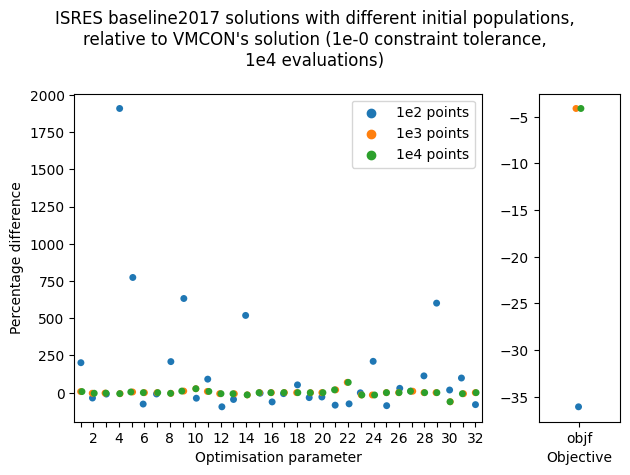

In [34]:
pop_size_dir = Path("/home/jon/data/process/baseline2017/isres_pop_size")
runs_metadata = [
    ps.RunMetadata(vmcon_run_dir / "baseline2017_MFILE.DAT", "vmcon"),
    ps.RunMetadata(pop_size_dir / "1e2" / mfile_name, "1e2 points"),
    ps.RunMetadata(pop_size_dir / "1e3" / mfile_name, "1e3 points"),
    ps.RunMetadata(pop_size_dir / "1e4" / mfile_name, "1e4 points")
]

pop_size_df = ps.global_comparison(runs_metadata, "vmcon", "ISRES baseline2017 solutions with different initial populations,\nrelative to VMCON's solution (1e-0 constraint tolerance,\n1e4 evaluations)")

It appears that for the same maximum number of evaluations (1e4), the initial population size affects the solution when low. 1e2 points actually results in a lower objective function, strangely, but for 1e3 and 1e4 points the solution remains the same. This indicates that the heuristic default of $20(n+1)$ is fine; there's no benefit to a larger initial population size.

Try for a higher maximum number of evaluations (1e5), with 1e3 and 1e4 population sizes.

/home/jon/code/notebooks/nlopt_process/plot_solvers.py:498: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(opt_params_labels)
/home/jon/code/notebooks/nlopt_process/plot_solvers.py:519: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(norm_objf_label)


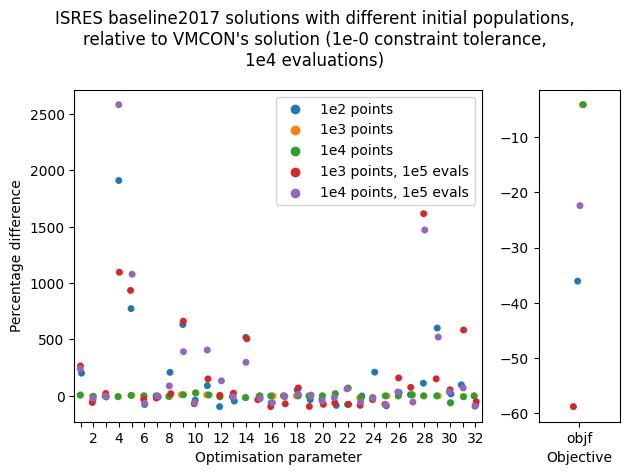

In [37]:
runs_metadata = [
    ps.RunMetadata(vmcon_run_dir / "baseline2017_MFILE.DAT", "vmcon"),
    ps.RunMetadata(pop_size_dir / "1e2" / mfile_name, "1e2 points"),
    ps.RunMetadata(pop_size_dir / "1e3" / mfile_name, "1e3 points"),
    ps.RunMetadata(pop_size_dir / "1e4" / mfile_name, "1e4 points"),
    ps.RunMetadata(pop_size_dir / "1e3_1e5_max_evals" / mfile_name, "1e3 points, 1e5 evals"),
    ps.RunMetadata(pop_size_dir / "1e4_1e5_max_evals" / mfile_name, "1e4 points, 1e5 evals")
]

pop_size_extended_df = ps.global_comparison(runs_metadata, "vmcon", "ISRES baseline2017 solutions with different initial populations,\nrelative to VMCON's solution (1e-0 constraint tolerance,\n1e4 evaluations)")

In [36]:
pop_size_extended_df[["tag", "norm_objf", "sqsumsq"]]

,tag,norm_objf,sqsumsq
0,vmcon,1.8922,1.921000e-10
1,1e2 points,1.2093,1.655900e+01
2,1e3 points,1.8144,8.624700e-01
3,1e4 points,1.8144,8.624700e-01
4,"1e3 points, 1e5 evals",0.7790,3.407100e+00
5,"1e4 points, 1e5 evals",1.4683,3.690800e+00


These are slightly confusing results: it may be the stochastic aspect that's dominating here. Unsurprisingly, running more evaluations leads to a lower objective, but strangely smaller initial populations also lead to lower objectives. Perhaps this is due to the runs with small initial populations having more evaluations left to optimise better.

This is partly inconclusive; a large initial population and high maximum evaluations are obviously preferable and most likely to lead to the global optimum. However, the default initial population of $20(n+1)$ (660, ~1e3) is a reasonable starting point. Greater numbers of evaluations seems to the dominant factor in finding a better optimum here.